<a href="https://colab.research.google.com/github/nomaantalib/machine-learning-project/blob/main/gold_rate_prediction_ybiProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
#import dataset for preprocessing

gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold_data.head()  #gives first five records.

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.tail() #gives last five records.

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.shape  #it gives the dimension or size of dataset

(2290, 6)

In [ ]:
gold_data.info() # gives all the information regarding datatypes,null_count etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_data.isnull().sum() # statment for determining null values.

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
print(gold_data)

           Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]


In [ ]:
gold_data.drop('Date',axis=1,inplace=True)

In [ ]:
correlation = gold_data.corr()


<Axes: >

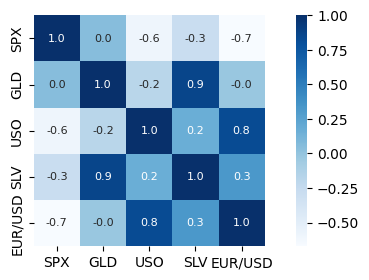

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,3)) #matplotlib obj named as "plt"
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,
annot_kws={'size':8}, cmap='Blues') #using seaborn lib as "sns " ,
 #helps to plot correlation graph.

In [ ]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-17-b94eac2e88dd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

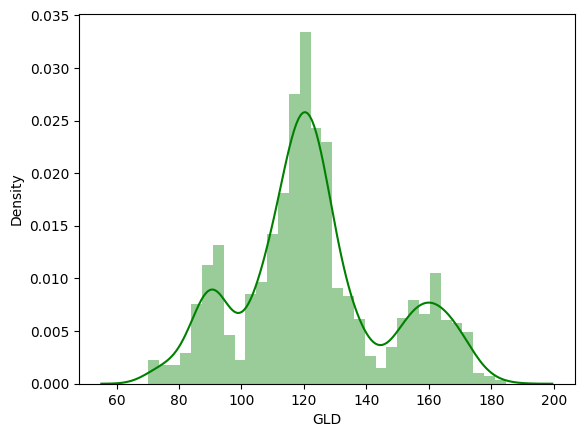

In [ ]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [ ]:
X = gold_data.drop(['GLD'],axis=1) #here we have taken two variable coordinate
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)
 #here we created four variables that will store splitted dataset for training and testing separately


In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(X_train,Y_train) #this determines the coefficient values 'a' and 'b' , in the regression

RandomForestRegressor()

In [ ]:
test_data_prediction = regressor.predict(X_test) #regressor algo is used in X_test split

In [ ]:
print(test_data_prediction)

[168.64919939  81.76289988 116.34940045 127.50740066 120.61450162
 154.8708978  150.15299789 126.10589988 117.41259874 126.25699982
 116.60910104 172.00040035 142.006099   167.77079803 115.13209976
 117.50750052 137.78290315 170.08980079 159.35620208 157.02019867
 155.06889962 125.51470017 176.78029929 157.19030367 125.2020006
  93.68879975  77.79229973 120.64620027 119.17919969 167.55719959
  88.0038008  125.09870034  91.12140077 117.78310011 121.0156993
 136.65590016 115.57350095 114.90600078 148.07139983 107.17270131
 104.19030229  87.23529809 126.50700086 117.8919002  151.41899915
 119.56450012 108.25400036 108.12619817  93.11400051 127.15209807
  75.16960047 113.71199951 121.54790006 111.26349894 118.96249904
 120.60869953 159.76960121 166.08920146 146.88949691  85.9583987
  94.46660046  86.79749899  90.43750019 118.85660063 126.43940052
 127.56740001 169.51179953 122.29799936 117.3641989   98.65470031
 168.2349019  142.82139821 131.95220198 121.23210212 121.30679946
 119.55090033

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
#we used sklearn lib as "mertics"  for finding error in test and train model prediction
print("R squared error : ", error_score)

R squared error :  0.9883973400025474


In [ ]:
Y_test = list(Y_test)

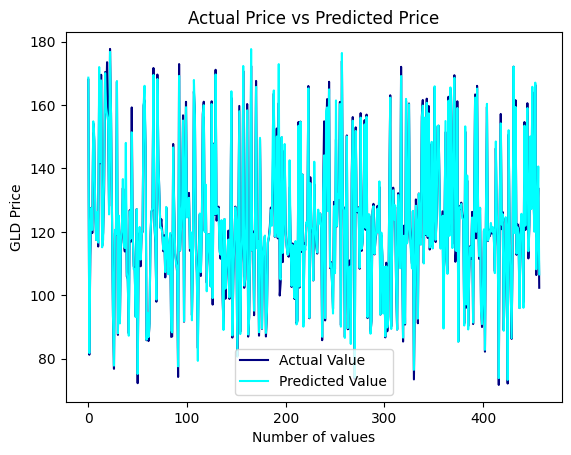

In [ ]:
plt.plot(Y_test, color='navy', label = 'Actual Value')
plt.plot(test_data_prediction, color='cyan', label='Predicted Value') #
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend() #graph plot legends eg. Actual Value & Predicted Value
plt.show()